In [1]:
!pip install tensorflow
!pip install ffmpeg-python
!pip install pillow

In [2]:
import ffmpeg
import numpy as np
import tensorflow as tf

from sbd import Params, sbd
from transnet_utils import draw_video_with_predictions, scenes_from_predictions

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
params = Params()
params.CHECKPOINT_PATH = "./model/transnet_model-F16_L3_S2_D256"

net = sbd(params)

Creating Build
           Input (?, ?, 27, 48, 3)
           SDDCNN_1
           > DDCNN_1 (?, ?, 27, 48, 64)
           > DDCNN_2 (?, ?, 27, 48, 64)
           MaxPool (?, ?, 13, 24, 64)
           SDDCNN_2
           > DDCNN_1 (?, ?, 13, 24, 128)
           > DDCNN_2 (?, ?, 13, 24, 128)
           MaxPool (?, ?, 6, 12, 128)
           SDDCNN_3
           > DDCNN_1 (?, ?, 6, 12, 256)
           > DDCNN_2 (?, ?, 6, 12, 256)
           MaxPool (?, ?, 3, 6, 256)
           Flatten (?, ?, 4608)
           Dense (?, ?, 256)
           Logits (?, ?, 2)
           Predictions (?, ?, 6, 12, 64)
Network built.
Found 4614850 trainable parameters.
INFO:tensorflow:Restoring parameters from ./model/transnet_model-F16_L3_S2_D256
Parameters restored from 'transnet_model-F16_L3_S2_D256'.


In [4]:
video_stream, err = (
    ffmpeg
    .input('test.mp4')
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(params.INPUT_WIDTH, params.INPUT_HEIGHT))
    .run(capture_stdout=True)
)
video = np.frombuffer(video_stream, np.uint8).reshape([-1, params.INPUT_HEIGHT, params.INPUT_WIDTH, 3])

In [5]:
predictions = net.predict_video(video)

Processing video frames 544/544


In [6]:
print(predictions.shape)

(544, 6, 12, 64)


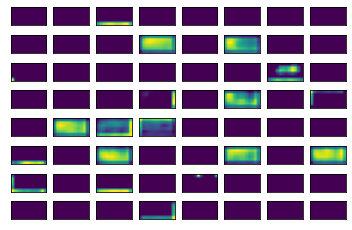

In [10]:
from matplotlib import pyplot as plt

# for i in range(30, 35):
#     square = 2
#     ix = 1
#     for _ in range(square):
#         for _ in range(square):
#             # specify subplot and turn of axis
#             ax = plt.subplot(square, square, ix)
#             ax.set_xticks([])
#             ax.set_yticks([])
#             # plot filter channel in grayscale
#             plt.imshow(predictions[i, :, :, ix-1])
#             print(predictions[i, :, :, ix-1].shape)
#             #plt.imshow(predictions[0, :, :, ix-1])
#             ix += 1
#     # show the figure
#     plt.show()
    
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(predictions[6, :, :, ix-1])
            #plt.imshow(predictions[0, :, :, ix-1])
            ix += 1
    # show the figure
plt.show()    